In [ ]:
From Correlation to Prediction:
Linear Regression, Assumptions, and Model Diagnostics


By the end of this lecture, you will be able to:

Explain the relationship between correlation and regression, and interpret regression coefficients.

Fit simple linear regression models in Python using Scikit-Learn.

Evaluate model fit using residual plots and error metrics (MAE, MSE, RMSE).

Identify assumption violations (linearity, independence, heteroscedasticity) and explain their impacts.

Example Dataset: Diabetes (Scikit-Learn)

load_diabetes() – classic regression dataset

Predictor X: BMI (body mass index, standardized)

Outcome Y: Diabetes progression one year after baseline

We’ll model:

How does BMI relate to disease progression?

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
X_all = diabetes.data
y = diabetes.target

# Put into a DataFrame for convenience
df = pd.DataFrame(X_all, columns=diabetes.feature_names)
df['target'] = y

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Correlation

Measures strength and direction of a linear relationship

Value between –1 and +1

Positive → X ↑, Y tends to ↑

Negative → X ↑, Y tends to ↓

Near 0 → weak linear relationship

Correlation ≠ causation, correlation ≠ prediction

In [2]:
# Correlation between BMI and target
df[['bmi', 'target']].corr()


,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


Y= β0+ β1​X+ε

Y = outcome (diabetes progression)

X = predictor (BMI)

𝛽0= intercept 

𝛽1= slope 

ε= error term 

Scikit-Learn Steps

Select X (BMI) and Y (target)

Create LinearRegression model

Fit model with .fit(X, y)

Inspect intercept_ and coef_

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Predictor: bmi (needs to be 2D for sklearn)
X = df[['bmi']]  # DataFrame with one column
y = df['target'] # Series

model = LinearRegression()
model.fit(X, y)

print("Intercept (beta_0):", model.intercept_)
print("Slope (beta_1):", model.coef_[0])


Intercept (beta_0): 152.13348416289617
Slope (beta_1): 949.4352603840388


y hat=β0​+β1​X=152.1+949.4×BMI

Intercept (beta_0) is the predicted progression when BMI=0
(mathematical baseline)
Slope (beta_1): change in predicted progression per  1-unit increase in standardized BMI 



residuali​=yi​−y^​i​
y_i=actual target value 
\(\hat{y}_i\): predited value from regression 


In [4]:
# Predicted values
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Quick look
residuals[:10]


0    -59.710038
1    -28.262195
2    -53.337033
3     64.875231
4     17.411426
5    -16.495323
6     30.644553
7    -87.334584
8   -100.710038
9    120.779530
Name: target, dtype: float64

Error Metrics

MAE (Mean Absolute Error)
Average |error|

MSE (Mean Squared Error)
Average squared error
(yi-yi hat)^2

RMSE (Root Mean Squared Error)
Square root of MSE, same units as Y

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 51.798627639533656
MSE: 3890.456585461273
RMSE: 62.37352471570989


Residual Plot

x-axis: predicted values (y hat) 

y-axis: residuals

Good pattern:

Residuals centered around 0

No obvious curve → supports linearity

Constant spread → supports homoscedasticity

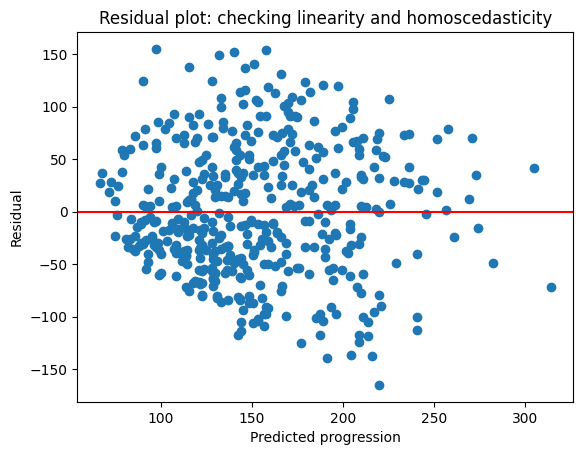

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted progression")
plt.ylabel("Residual")
plt.title("Residual plot: checking linearity and homoscedasticity")
plt.show()


Independence Assumption

Errors (residuals) should not be systematically related to each other

Especially important with time series or clustered data

Violations:

Autocorrelation (errors today depend on errors yesterday)

Cluster effects (patients within the same group behave similarly)

You learned how to:

Relate correlation and regression

Interpret intercept and slope

Fit simple linear regression in Scikit-Learn

Evaluate fit using MAE, MSE, RMSE and residual plots

Understand and diagnose violations of linearity, independence, and homoscedasticity